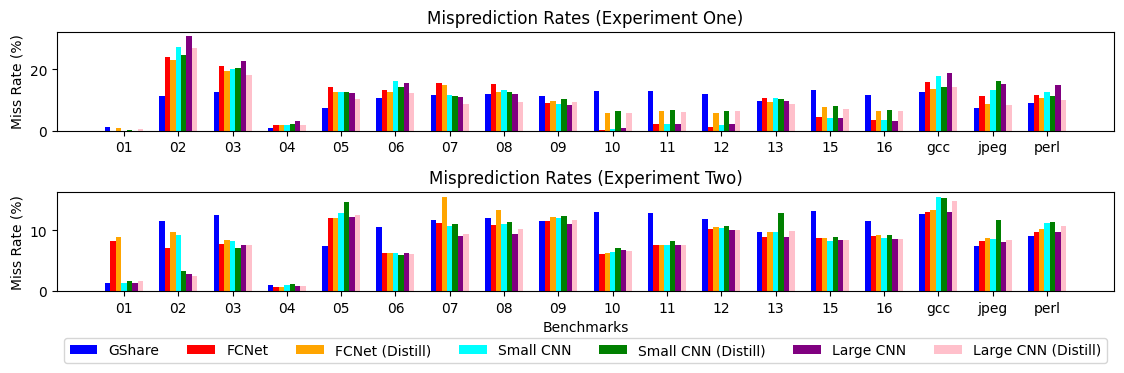

In [58]:
import matplotlib.pyplot as plt

with open("logs/benchmark_results.txt") as f:
    original_lines = f.readlines()

with open("logs/new_benchmarks.txt", "r") as f:
    lines = f.readlines()

def plot_misprediction_rates(ax, lines, title, legend=True):
    # Initialize lists to hold the data
    benchmarks = []
    gshare_rates = []
    dbn_rates = []
    lenet_rates = []
    alexnet_rates = []
    dbn_mimic_rates = []
    lenet_mimic_rates = []
    alexnet_mimic_rates = []

    # Parse the lines
    for line in lines:
        if "Benchmarking" in line:
            # Simplify the benchmark name
            benchmarks.append(line.split("/")[-1].strip().split(".")[0].replace("traces_", "").replace("_Formatted", "").replace("orig", "").replace("trace", "").replace("_", ""))
        elif "GShare Misprediction Rate:" in line:
            gshare_rates.append(float(line.split(":")[-1].strip()))
        elif "DBN Misprediction Rate:" in line and "Mimic" not in line:
            dbn_rates.append(float(line.split(":")[-1].strip()))
        elif "LeNet Misprediction Rate:" in line and "Mimic" not in line:
            lenet_rates.append(float(line.split(":")[-1].strip()))
        elif "AlexNet Misprediction Rate:" in line and "Mimic" not in line:
            alexnet_rates.append(float(line.split(":")[-1].strip()))
        elif "DBN Misprediction Rate (Mimic):" in line:
            dbn_mimic_rates.append(float(line.split(":")[-1].strip()))
        elif "LeNet Misprediction Rate (Mimic):" in line:
            lenet_mimic_rates.append(float(line.split(":")[-1].strip()))
        elif "AlexNet Misprediction Rate (Mimic):" in line:
            alexnet_mimic_rates.append(float(line.split(":")[-1].strip()))

    # Sort benchmarks and rates by benchmark names
    sorted_indices = sorted(range(len(benchmarks)), key=lambda k: benchmarks[k])
    benchmarks = [benchmarks[i] for i in sorted_indices]
    gshare_rates = [gshare_rates[i] for i in sorted_indices]
    dbn_rates = [dbn_rates[i] for i in sorted_indices]
    lenet_rates = [lenet_rates[i] for i in sorted_indices]
    alexnet_rates = [alexnet_rates[i] for i in sorted_indices]
    dbn_mimic_rates = [dbn_mimic_rates[i] for i in sorted_indices]
    lenet_mimic_rates = [lenet_mimic_rates[i] for i in sorted_indices]
    alexnet_mimic_rates = [alexnet_mimic_rates[i] for i in sorted_indices]
    
    # Create a bar graph on the provided axis
    x = range(len(benchmarks))
    width = 0.1
    ax.bar(x, gshare_rates, width, label='GShare', color='blue')
    ax.bar([p + width for p in x], dbn_rates, width, label='FCNet', color='red')
    ax.bar([p + width * 2 for p in x], dbn_mimic_rates, width, label='FCNet (Distill)', color='orange')
    ax.bar([p + width * 3 for p in x], lenet_rates, width, label='Small CNN', color='cyan')
    ax.bar([p + width * 4 for p in x], lenet_mimic_rates, width, label='Small CNN (Distill)', color='green')
    ax.bar([p + width * 5 for p in x], alexnet_rates, width, label='Large CNN', color='purple')
    ax.bar([p + width * 6 for p in x], alexnet_mimic_rates, width, label='Large CNN (Distill)', color='pink')
    
    if legend:
        ax.set_xlabel('Benchmarks')
    ax.set_ylabel('Miss Rate (%)')
    ax.set_title(title)
    ax.set_xticks([p + width * 3 for p in x])
    ax.set_xticklabels(benchmarks)

    if legend:
        # Create a legend with 7 columns
        ax.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.4), fontsize=10)
    
# Create a 2x1 subplots figure
fig, axs = plt.subplots(2, 1, figsize=(12, 4))

# Plot the original benchmark results in the first subplot
plot_misprediction_rates(axs[0], original_lines, "Misprediction Rates (Experiment One)", legend=False)

# Plot the new benchmark results in the second subplot
plot_misprediction_rates(axs[1], lines, "Misprediction Rates (Experiment Two)")

plt.tight_layout()
plt.savefig("combined_misprediction_rates.png", dpi=300)
plt.show()
